A shape: (19680, 26896)
m shape: (164, 120)
Section shape: (120,)


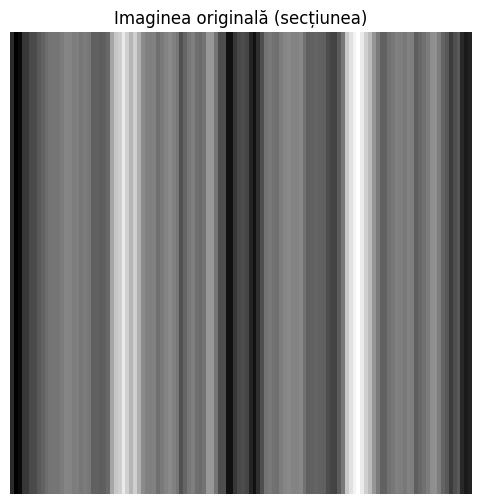

In [10]:
import numpy as np
import scipy.io
import scipy.sparse
import scipy.fftpack
import matplotlib.pyplot as plt
from skimage.transform import iradon, radon


data = scipy.io.loadmat('Data164.mat')
A = data['A']  
m = data['m']  

print("A shape:", A.shape)
print("m shape:", m.shape)

section = m[80, :]
print("Section shape:", section.shape)

section_image = np.tile(section, (len(section), 1)) 

plt.figure(figsize=(6,6)); plt.title('Section'); plt.imshow(section_image, cmap='gray'); plt.axis('off')
plt.show()

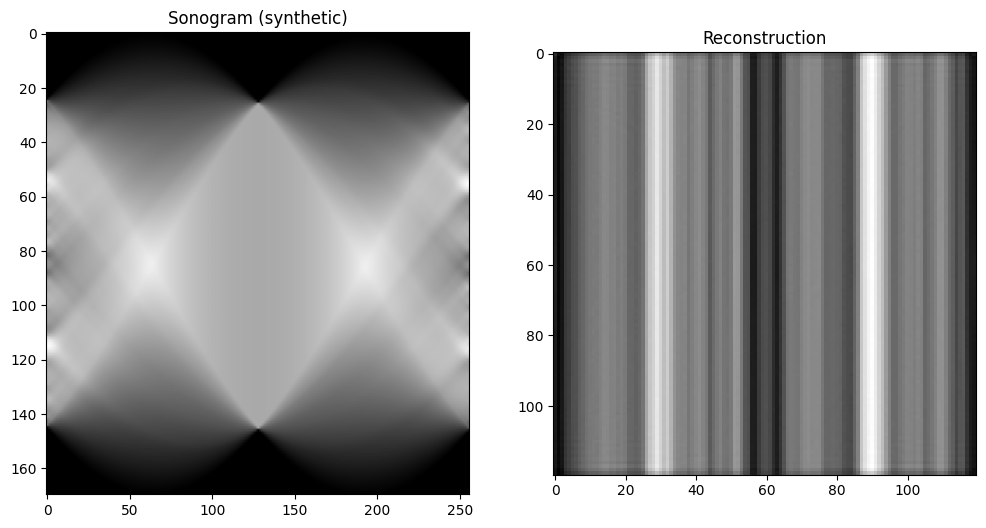

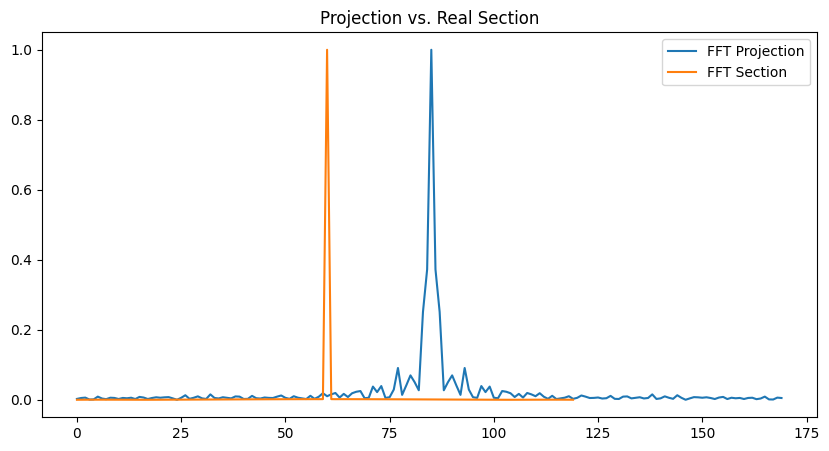

In [35]:
def simulate_projections(section, num_angles):
    angles = np.linspace(0., 180., num=num_angles, endpoint=False)
    section_image = np.tile(section, (len(section), 1)) 
    sinogram = radon(section_image, theta=angles, circle=False)
    return sinogram, angles

num_angles = 256 # change accuracy by changing num_angles
sinogram_simulated, angles = simulate_projections(section, num_angles)

reconstruction_fbp = iradon(sinogram_simulated, theta=angles, filter_name='ramp', circle=False)


plt.figure(figsize=(12, 6))
plt.subplot(121); plt.title('Sonogram (synthetic)'); plt.imshow(sinogram_simulated, cmap='gray', aspect='auto')
plt.subplot(122); plt.title('Reconstruction'); plt.imshow(reconstruction_fbp, cmap='gray')
plt.show()

projection_fft = np.fft.fftshift(np.fft.fft(sinogram_simulated[:, 0]))
image_fft2 = np.fft.fftshift(np.fft.fft2(reconstruction_fbp))


center_line = image_fft2[:, image_fft2.shape[1]//2]

plt.figure(figsize=(10, 5))
plt.title('Projection vs. Real Section')
plt.plot(np.abs(projection_fft) / np.max(np.abs(projection_fft)), label='FFT Projection')
plt.plot(np.abs(center_line) / np.max(np.abs(center_line)), label='FFT Section')
plt.legend()
plt.show()

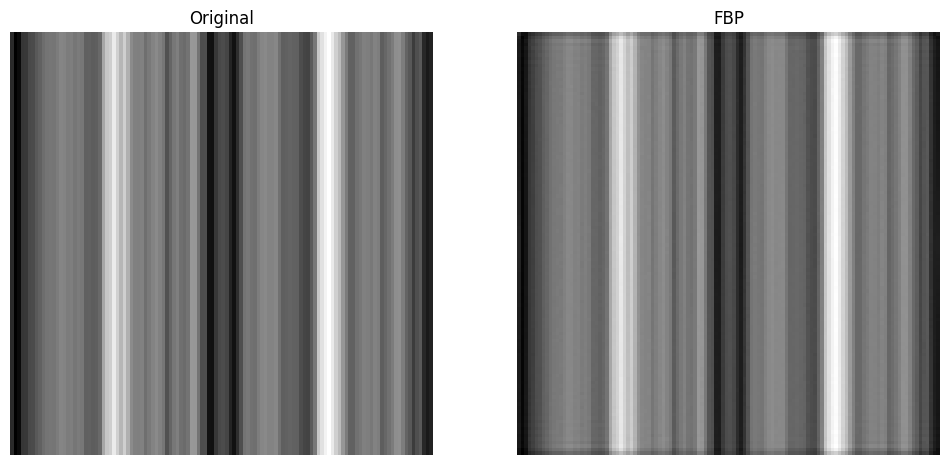

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(section_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('FBP')
plt.imshow(reconstruction_fbp, cmap='gray')
plt.axis('off')

plt.show()

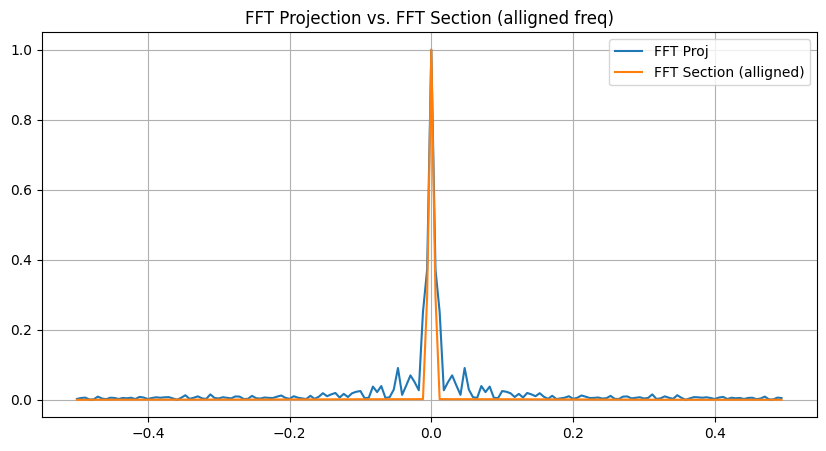

In [37]:
freq_proj = np.fft.fftshift(np.fft.fftfreq(len(projection_fft)))
freq_image = np.fft.fftshift(np.fft.fftfreq(center_line.shape[0]))

from scipy.interpolate import interp1d

interp_func = interp1d(freq_image, np.abs(center_line), kind='linear', fill_value="extrapolate")
center_line_interp = interp_func(freq_proj)

projection_fft_norm = np.abs(projection_fft) / np.max(np.abs(projection_fft))
center_line_interp_norm = center_line_interp / np.max(center_line_interp)

plt.figure(figsize=(10,5))
plt.title('FFT Projection vs. FFT Section (alligned freq)')
plt.plot(freq_proj, projection_fft_norm, label='FFT Proj')
plt.plot(freq_proj, center_line_interp_norm, label='FFT Section (alligned)')
plt.legend()
plt.grid(True)
plt.show()